# Machine Learning

Machine learning is the science of making computers able to act based on available data without being explicitly programmed to act a certain way. The field of learning from data has been evolving over the past half-century. However, due to the exponential rise in available quantity and quality of data in the past decade, and the available computing resources, we have seen an advent of sophisticated AI agents, self-driving cars, highly intelligent spam filtering, picture tagging applications, personalized web search, and so on. The primary reason for this revolution in technology is being attributed to machine learning.

The most accepted definition of machine learning is given by Tom Mitchell.

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E. 
—Tom Mitchell


A general notion of machine learning is to focus on the process of learning from data to discover hidden patterns or predict future events. There are two basic approaches within machine learning, namely, supervised learning and unsupervised learning. The main difference is one uses labelled data to help predict outcomes while the other does not.

# Structure of a Machine Learning System

A machine learning system either acts by itself or forms a major building block of large-scale enterprise applications.

Out of the production and deployment process and data pipelines, it can be thought of being constructed in two subprocesses in a broad sense. The first part is usually an offline process, which often involves the training, in which we process the real-world data to learn certain parameters that can help predict the results and discover the patterns in previously unseen data. The second part is the online process, which involves the prediction phase, in which we leverage the parameters we have learned before and find the results in previously unseen data. 

Based on the quality of results we have obtained as a result, we may decide to make modifications, add more data, and restart the whole process. Such a process, with the help of thorough evaluation metrics, hyperparameter tuning methodologies, and the right choice of features, iteratively produces better and better results.

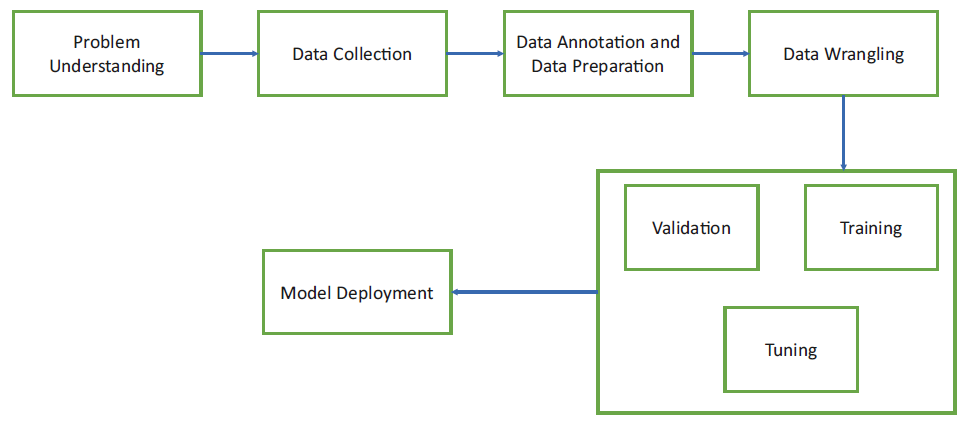

## Problem Understanding
Before writing your first line of code, you need to have a thorough understanding of the
problem you are trying to solve. This requires discussions with multiple stakeholders
and opening the conversations about the right scope of the problems. This would give a
clear direction for the next stages of the process.

## Data Collection
Once the problem is clear and the right scope has been defined, we can begin to collect
the data. Data may come from machine logs, user logs, transaction records, etc. In some
cases, the data may be available outright through other teams in the organization or the
client itself. In other cases, you might need to hire external agencies or purchase the
well-curated data from external providers. In some cases, you might need to collect the
data by preparing scraping scripts or leveraging external APIs of some web services.
For many use cases, you can initially search for open source or publicly available
datasets that are often shared in public forums or government websites. For the scope of
this book, we will restrict ourselves to openly available datasets.

## Data Annotation and Data Preparation
The raw data that you thus obtain might not always be ready to be used. In case you are
working with a supervised problem, you might require a person or a team to assign the
correct labels to your data. For example, if you are preparing textual data for sentiment
analysis, you may collect it by crawling blogs and social media pages, and after that, you
need to take each sentence and assign it a positive or negative label depending on the
sentiment polarity it carries.
Data preparation might also require data cleaning, reformatting, and normalization.
For example, in the same example, you might want to remove the sentences that are
badly structured, or which are too short or in another language. With images, you might
require resizing, noise reduction, cropping, etc.
In some cases, you might want to augment the data by combining multiple data
sources. For example, if you have official records of an employee’s details, you might join
another table in your database that contains the employee’s past performance records.

## Data Wrangling
In all the algorithms that we would study in the future chapters, you will notice that there
is an expected format in which they require the data. In general, we want to convert or
transform the data from any format into vectors containing numbers. In images, you
can look at color channels that contain a value in the 0–255 range for each channel, red,
green, and blue. For text, there are multiple common ways to convert the data into vector
format. We will study these methods in depth in the next chapter.

## Model Development, Training, and Evaluation
In most of the cases, we will leverage existing implementations of algorithms that
are already provided in popular packages like Scikit-learn, TensorFlow, PyTorch, etc.
However, in some cases, you might need to tweak them before the learning starts. The
well-formatted data is then sent to the algorithm for training, during which the model
is prepared, which is often a set of parameters or weights related to a predefined set of
equations or a graph. 

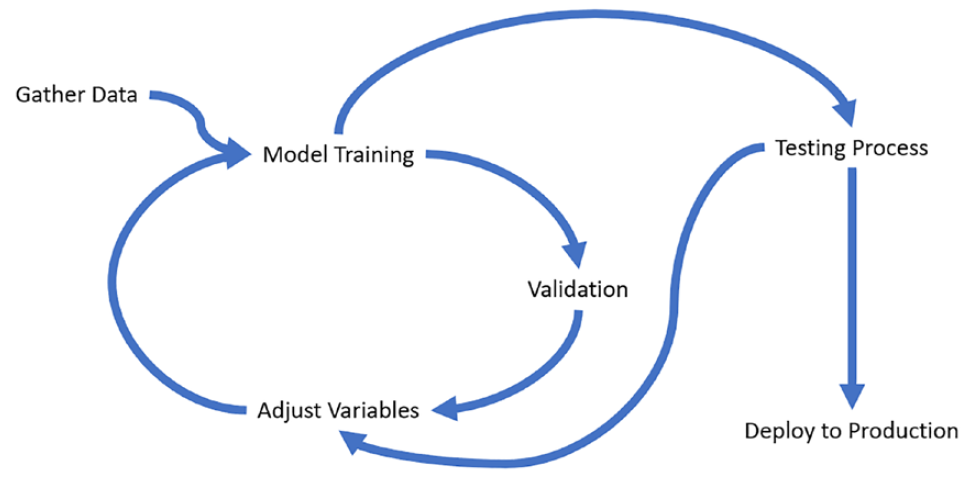

Training usually happens in conjunction with testing over multiple iterations till a
model of reliable quality is obtained. You will learn the model
parameters using a major proportion of the available data and use the same parameters
to predict the results for the remaining portion.

## Model Deployment
Once you have created a model that is ready for inference, you have to make it work as
a building block that can be integrated in the production environment. In some cases,
this can be a set of scripts that are invoked whenever prediction is required. However,
in most enterprise scenarios, this will have to be set up through continuous integration
pipelines and hosted in the systems that are capable of handling the anticipated loads.

As the model is deployed, it will see the new data and predict the values for it. In
some cases, it might be possible to collect the new data and build an improved version
of dataset for future iterations. You will often retrain and update the model from time to
time to increase the performance and reliability of the model.


# Scikit-Learn

Scikit-learn is a highly popular library for machine learning that provides ready-to-use implementations of various supervised and unsupervised machine learning algorithms through a simple and consistent interface. It is built upon the SciPy stack, which involves NumPy, SciPy, Matplotlib, Pandas, etc.

Scikit-learn was initially started in 2007 as a Google Summer of Code project by David Cournapeau, who has also been involved in the development of NumPy and SciPy. By 2010, more developers were starting to get involved, and the first public release
was made in February 2010.

# Understanding the API

One primary reason for popularity and growth of Scikit-learn is the simplicity of use despite the powerful implementation.

Scikit-learn is designed in a way to have similar interfaces across the functionalities offered by the library. It is organized around three primary APIs, namely, estimator, predictor, and transformer. 

**Estimators** are the core interface implemented by
classification, regression, clustering, feature extraction, and dimensionality reduction
methods. An estimator is initialized from hyperparameter values and implements the
actual learning process in the fit method, which you call while providing the input data
and labels in the form of X_train and y_train arrays. It will run the learning algorithm
to learn the parameters and store them for future use.

**Predictors** provide a predict method to take the data which needs to be predicted
through a NumPy array that we usually refer to as X_test. It applies the required
transformation with respect to the parameters that have been learned by the fit method
and provides the predicted values or labels. Some unsupervised learning estimators
provide a predict method to obtain the cluster labels.

**Transformer** interfaces implement the mechanism to transform the given data in the
form of NumPy array through the preprocessing and feature extraction stages. Scaling
and normalization methods implement the transform method which can be called after
learning the parameters. We will discuss transformation in depth in the next chapter.

Several algorithm implementations in Scikit-learn implement one or more of these
three interfaces. Some methods can be chained to perform multiple tasks in a single
line of code. This can be further simplified with the use of Pipeline objects that chain
multiple estimators into a single one. Thus, you can encapsulate multiple preprocessing,
transformation, and prediction steps into a single object.

    pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

# Preparing Data

### Transforming Nominal Attributes

Consider the Gender attribute, which may have three values – Male, Female, and Other.

This is a nominal attribute as arithmetic operations can’t be applied, and we can’t compare the values with each other. This can be expressed as a vector of possible values. 

Say, there’s a student with the following values:

    Edward Remirez, Male, 28 years, Bachelors Degree

We can convert the gender column to the set of three values:

    Edward Remirez, 0, 1, 0, 28 years, Bachelors Degree
    
This kind of transformation is called one-hot encoding.    

In [ ]:
import pandas as pd
df = pd.DataFrame([["William Smith","Male",28,"Bachelors"],
["Judy Pinkett","Female",23,"Masters"],
["Christian Rock","Male",19,"High School"]], columns=['Name','Gender','Age',
'Degree'])

df

#### Create a One Hot Encoder for Gender Column

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder_for_gender = OneHotEncoder().fit(df[['Gender']])

In [ ]:
encoder_for_gender.categories_

In [ ]:
gender_values = encoder_for_gender.transform(df[['Gender']])
gender_values

In [ ]:
gender_values.toarray()

In [ ]:
df[['Gender_F', 'Gender_M']] = gender_values.toarray()

In [ ]:
df

### Transforming Ordinal Attributes

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_for_education = OrdinalEncoder()
encoder_for_education.fit_transform(df[['Degree']])
encoder_for_education.categories_

In [ ]:
encoder_for_education = OrdinalEncoder(categories = [['Masters', 'Bachelors','High School', 'Doctoral']])
df[['Degree_encoded']] = encoder_for_education.fit_transform(df[['Degree']])
df

In [ ]:
df.drop(columns=['Name', 'Gender', 'Degree'], inplace=True)

In [ ]:
df

### Discussion
Load titanic dataset and explore ideas on how to transform.

- What are the categorical or nominal attributes in Titanic dataset?
- What are the ordinal attributes?
- What are the numerical attributes that can be used as they are?

# Normalization

Another important preprocessing step is to normalize the data so that the features
are in a similar range. It is highly important especially in case of experiments that
use algorithms that are affected by the distribution shape or are based on vector- or
distance-based computations.

## Min-Max Scaling
Min-max scaling transforms each feature by compressing it down to a scale where the
minimum number in the dataset maps to zero and the maximum number maps to one.
The transformation is given by:
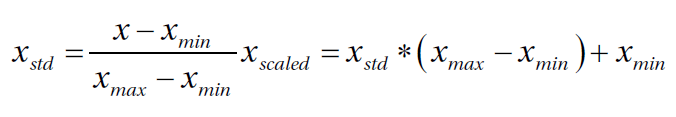

## Standard Scaling
Standard scaling standardizes the feature values by removing the mean and scaling
to unit variance. The value thus represents the z-value with respect to the mean and
variance of the column. The standard score of a sample is calculated as:
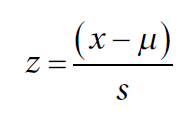

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df

# Creating a Classification model for Surviving Titanic 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this experiment, we will analyze and find patterns that indicate who might have a better chance at survival.

The dataset shared here is public information, though these files are sourced from Kaggle. After this 2-Day course, you are encouraged to attempt the open challenge at https://www.kaggle.com/c/titanic


In [ ]:
import pandas as pd
filepath = "../data/train.csv"
titanic = pd.read_csv(filepath)

In [ ]:
from sklearn.model_selection import train_test_split
titanic_train, titanic_test = train_test_split(titanic)

## Preparing the Data
Encode and transform the columns that you want to use for building a model.

I'm going to use only Pclass, Sex, Age, Fare; and Survived

In [ ]:
titanic_train.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
encoder_for_sex = OneHotEncoder().fit(titanic_train[['Sex']])
encoder_for_sex.categories_

In [ ]:
scaler_for_age = MinMaxScaler().fit(titanic_train[['Age']])
scaler_for_fare = MinMaxScaler().fit(titanic_train[['Fare']])

In [ ]:
titanic_train[['sex_female', 'sex_male']] = encoder_for_sex.transform(titanic_train[['Sex']]).toarray()

In [ ]:
titanic_train[['age_normalized']] = scaler_for_age.transform(titanic_train[['Age']])

In [ ]:
titanic_train[['fare_normalized']] = scaler_for_fare.transform(titanic_train[['Fare']])

### Creating the data vectors

In [ ]:
titanic_train.head(2)

In [ ]:
X_train = titanic_train[['Pclass', 'sex_female', 'sex_male', 'age_normalized', 'fare_normalized']]
y_train = titanic_train['Survived']

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

## Handling Empty Values

In [ ]:
X_train.describe()

In [ ]:
X_train[['age_normalized']].isnull()

In [ ]:
X_train[['age_normalized']] = X_train[['age_normalized']].fillna(X_train[['age_normalized']].mean())

## Logistic Regression
For this experiment, we will use a simple method called Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

In [ ]:
logistic_regression

In [ ]:
def get_vector(pclass, sex, age, fare):
    df = pd.DataFrame([[pclass, sex, age, fare]], columns=["Pclass", "Sex", "Age", "Fare"])
    df[['sex_female', 'sex_male']] = encoder_for_sex.transform(df[['Sex']]).toarray()
    df[['age_normalized']] = scaler_for_age.transform(df[['Age']])
    df[['fare_normalized']] = scaler_for_fare.transform(df[['Fare']])
    df = df.drop(columns=['Sex', 'Age', 'Fare'])
    return df
        
x_test = get_vector(3,'male', 22, '120')
logistic_regression.predict(x_test)

# Crossvalidation and Hyperparameter Tuning

### Importance of Test Dataset

Discussion: Measuring the accuracy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
import pandas as pd
# filepath = "../data/test_label.csv"
# titanic_test = pd.read_csv(filepath)

titanic_test[['sex_female', 'sex_male']] = encoder_for_sex.transform(titanic_test[['Sex']]).toarray()
titanic_test[['age_normalized']] = scaler_for_age.transform(titanic_test[['Age']])
titanic_test[['fare_normalized']] = scaler_for_fare.transform(titanic_test[['Fare']])
titanic_test[['age_normalized']] = titanic_test[['age_normalized']].fillna(titanic_test[['age_normalized']].mean())
X_test = titanic_test [['Pclass', 'sex_female', 'sex_male', 'age_normalized', 'fare_normalized']]
X_test =  X_test.fillna('0')
y_test = titanic_test ['Survived']


In [ ]:
X_test

In [ ]:
y_pred = logistic_regression.predict(X_test)

In [ ]:
y_pred

### How did we do?

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
print (classification_report(y_test, y_pred))

# Hyperparameter Tuning

Discussion: What can 'still' go wrong?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate 
import numpy as np

In [ ]:
hyperparameter_score_list = []
for p in range(1,4):
    for neighbor in range(2,7):
        knn = KNeighborsClassifier(p=p, n_neighbors=neighbor)
        scores = cross_validate(knn, X_train, y_train, cv=10, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([p, neighbor, mean_score])

In [ ]:
hyperparameter_score_list

In [ ]:
knn = KNeighborsClassifier(p=2, n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print (classification_report(y_test, y_pred))